In [ ]:
import os
os.getcwd()

In [2]:
!ls

'Create Data (1).ipynb'   data_producer.py	   loss.py	 train.py
 Depth_Estimation.ipynb   data_producer_depth.py   model.py	 validate.py
 Untitled.ipynb		  depth.zip		   overlay.zip	 visualize.py
 __pycache__		  dice_loss.py		   runs
 data			  lean_model.py		   test.py


In [3]:
import torch
torch.cuda.empty_cache()

In [4]:
from pathlib import Path

root_folder = Path.cwd()

In [5]:
import torch
cuda_check = torch.cuda.is_available()
device = torch.device("cuda:0" if cuda_check else "cpu")

In [6]:
print(device)

cuda:0


In [7]:
print(root_folder)

/workspace/Assignment 15


In [8]:
from torchvision.transforms import transforms

transformFG = transforms.Compose([
                                 transforms.ToTensor(),
                                 transforms.Normalize((0.49737222, 0.49328762, 0.46562814), (0.21714624, 0.21749634, 0.23051126)),
                                 
])

transformDepth = transforms.Compose([
                                transforms.ToTensor(),
])

In [9]:
from torch.utils.tensorboard import SummaryWriter

In [10]:
from torchvision.transforms import transforms
from pathlib import Path
data_folder = root_folder / 'data'
train_folder = data_folder / 'train'
# test_folder = data_folder / 'test1'
# validate_folder = data_folder / 'validate1'
weights_folder = data_folder / 'depthweights'


In [11]:
writer = SummaryWriter('runs')

In [12]:
import data_producer as dp
import data_producer_depth as dpd
import model as md
import train
import test
import validate
import visualize as viz
import dice_loss as dl
import loss
import lean_model

In [13]:
train_set = dpd.DataProducer(train_folder, transformFG, transformDepth)

In [14]:
from torch.utils.data import DataLoader
train_dl = DataLoader(train_set, batch_size=256, shuffle= True, num_workers = 12)
# test_dl = DataLoader(test_set, batch_size=16, shuffle= True,num_workers = 6)
# validate_dl = DataLoader(validate_set, batch_size=16, shuffle= True, num_workers = 6)

In [15]:
model = md.ResNetUNet(n_class=1)
model = model.to(device)

In [16]:
from torchsummary import summary
summary(model, input_size=(3,64,64))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 64, 64]           1,792
              ReLU-2           [-1, 64, 64, 64]               0
            Conv2d-3           [-1, 64, 64, 64]          36,928
              ReLU-4           [-1, 64, 64, 64]               0
            Conv2d-5           [-1, 64, 32, 32]           9,408
            Conv2d-6           [-1, 64, 32, 32]           9,408
       BatchNorm2d-7           [-1, 64, 32, 32]             128
       BatchNorm2d-8           [-1, 64, 32, 32]             128
              ReLU-9           [-1, 64, 32, 32]               0
             ReLU-10           [-1, 64, 32, 32]               0
        MaxPool2d-11           [-1, 64, 16, 16]               0
        MaxPool2d-12           [-1, 64, 16, 16]               0
           Conv2d-13           [-1, 64, 16, 16]          36,864
           Conv2d-14           [-1, 64,

In [17]:
criterion = torch.nn.L1Loss()

In [18]:
optim = torch.optim.SGD(model.parameters(), lr = 0.01, momentum=.9, weight_decay=1e-5)

Epoch -  1 -- Time Taken -  61.18522644042969
Epoch -  2 -- Time Taken -  61.896706104278564
Epoch -  3 -- Time Taken -  62.367499113082886
Epoch -  4 -- Time Taken -  62.13230013847351
Epoch -  5 -- Time Taken -  62.187796115875244
Epoch -  6 -- Time Taken -  62.64780831336975
Epoch -  7 -- Time Taken -  62.136789083480835
Epoch -  8 -- Time Taken -  62.44045114517212
Epoch -  9 -- Time Taken -  62.17351269721985
Epoch -  10 -- Time Taken -  62.53637099266052
Epoch -  11 -- Time Taken -  62.55473875999451
Epoch -  12 -- Time Taken -  62.38409090042114
Epoch -  13 -- Time Taken -  62.65729904174805
Epoch -  14 -- Time Taken -  62.40932035446167
Epoch -  15 -- Time Taken -  62.177722454071045
Epoch -  16 -- Time Taken -  62.47746968269348
Epoch -  17 -- Time Taken -  62.11275863647461
Epoch -  18 -- Time Taken -  62.16179180145264
Epoch -  19 -- Time Taken -  62.08852171897888
Epoch -  20 -- Time Taken -  62.30703663825989
Epoch -  21 -- Time Taken -  62.63177442550659
Epoch -  22 -- Ti

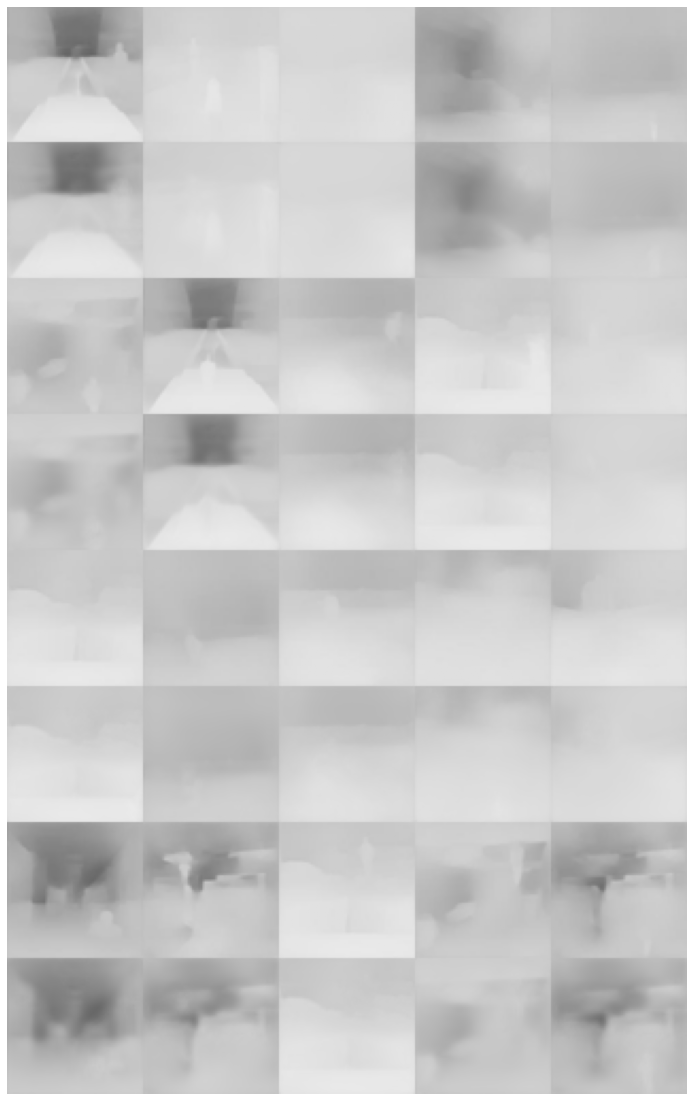

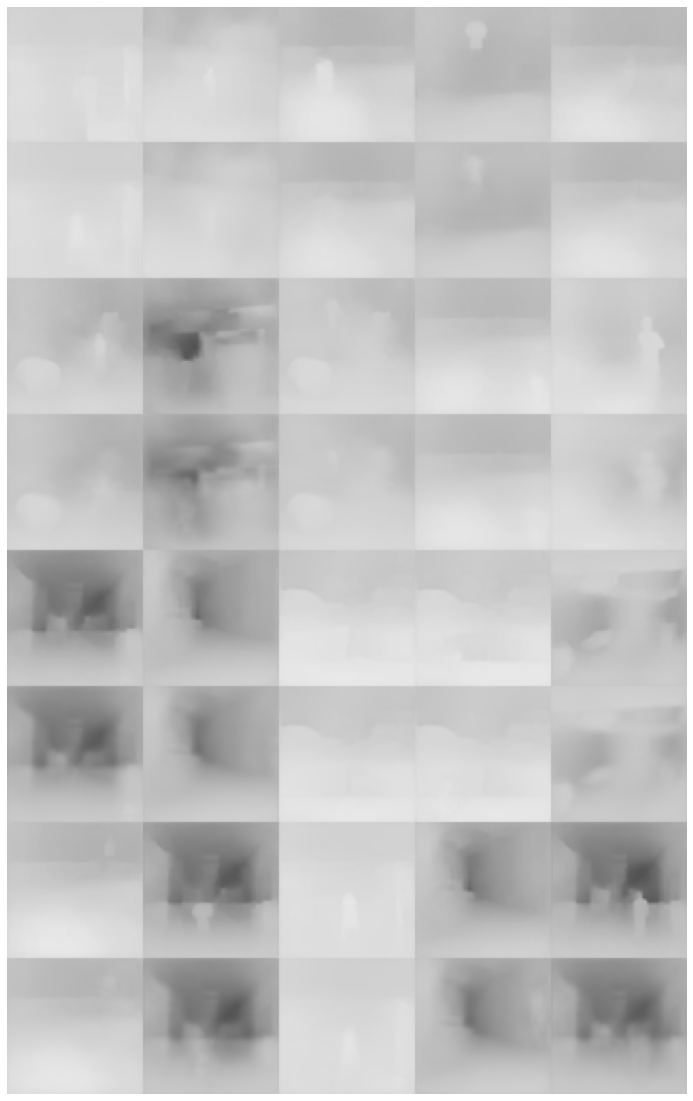

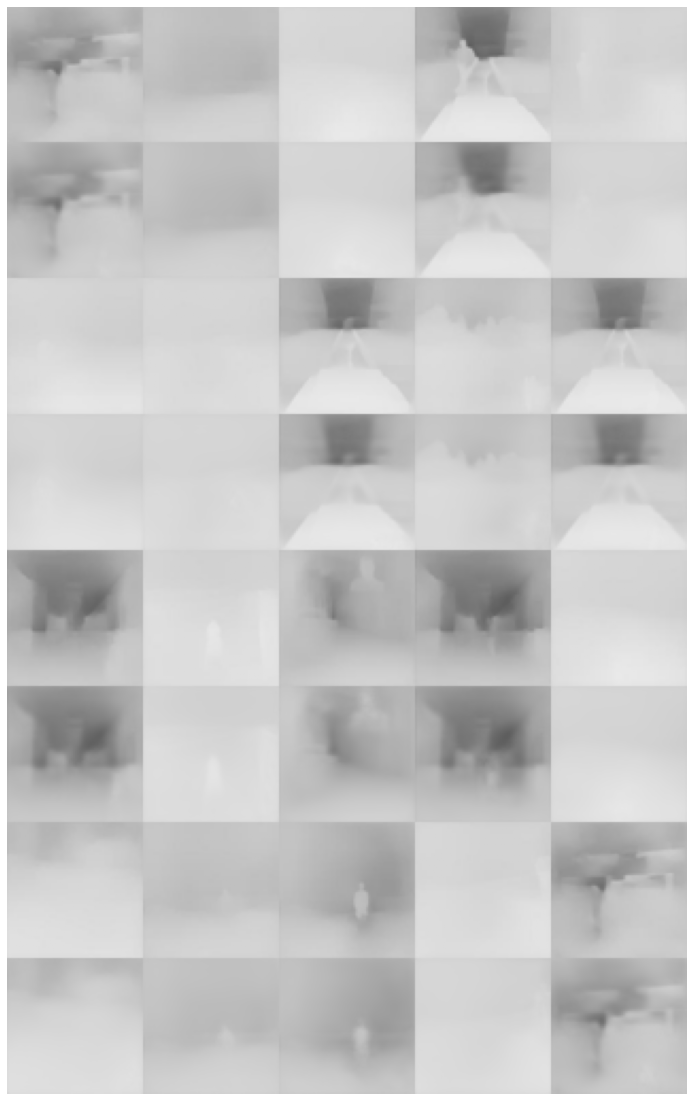

In [19]:
import time

for epoch in range(1,151):
  start = time.time()
  train.train(model, criterion, device, train_dl, optim, epoch, writer)
  end = time.time()
  print('Epoch - ', str(epoch), '-- Time Taken - ', str(end - start) )
  if epoch % 10 == 0:
    file_name = str(weights_folder) + '/epoch-' + str(epoch) + 'dweights.pth'
    torch.save(model.state_dict(), file_name)

Epoch -  151 -- Time Taken -  62.45099472999573
Epoch -  152 -- Time Taken -  62.553853034973145
Epoch -  153 -- Time Taken -  62.67052721977234
Epoch -  154 -- Time Taken -  62.307353496551514
Epoch -  155 -- Time Taken -  62.877482891082764
Epoch -  156 -- Time Taken -  62.60603713989258
Epoch -  157 -- Time Taken -  62.92782926559448
Epoch -  158 -- Time Taken -  62.565592527389526
Epoch -  159 -- Time Taken -  62.693870306015015
Epoch -  160 -- Time Taken -  62.89149713516235
Epoch -  161 -- Time Taken -  62.5377459526062
Epoch -  162 -- Time Taken -  62.49958276748657
Epoch -  163 -- Time Taken -  62.64174127578735
Epoch -  164 -- Time Taken -  62.62844920158386
Epoch -  165 -- Time Taken -  62.61631464958191
Epoch -  166 -- Time Taken -  62.63259720802307
Epoch -  167 -- Time Taken -  62.72151708602905
Epoch -  168 -- Time Taken -  62.90972423553467
Epoch -  169 -- Time Taken -  62.4994010925293
Epoch -  170 -- Time Taken -  62.67316150665283
Epoch -  171 -- Time Taken -  62.5593

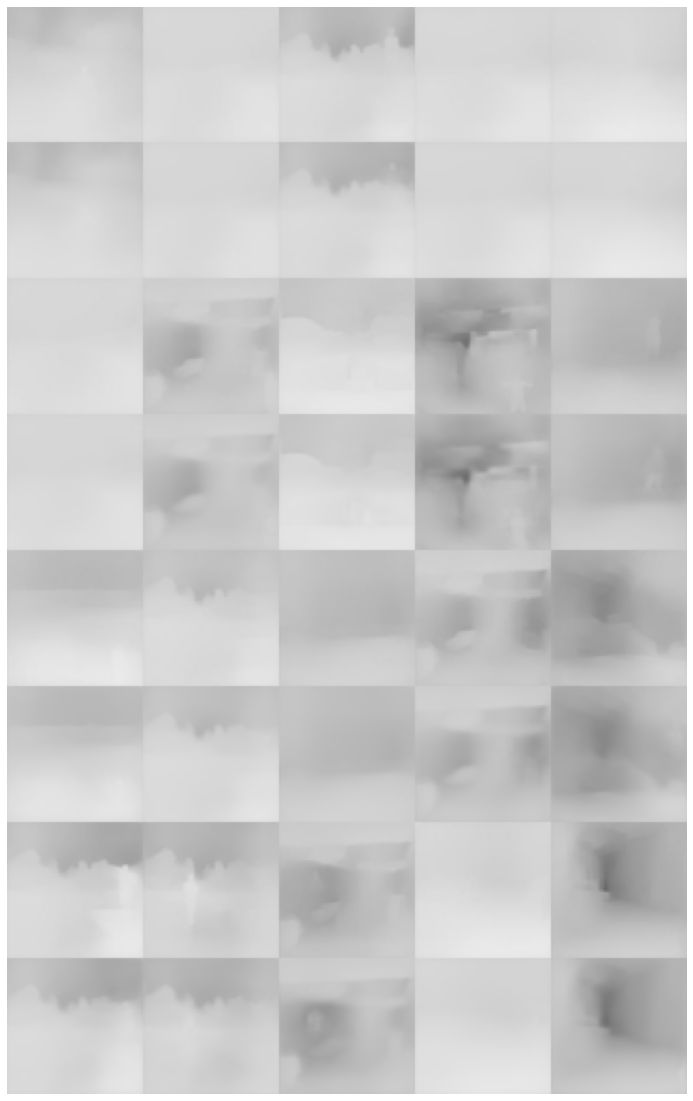

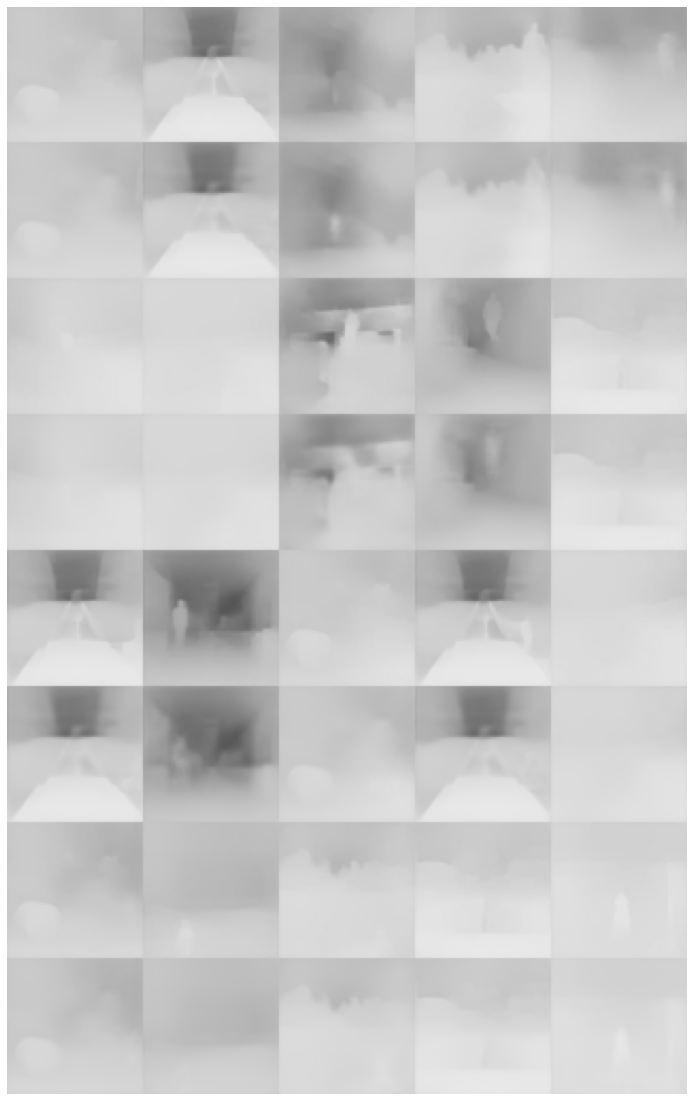

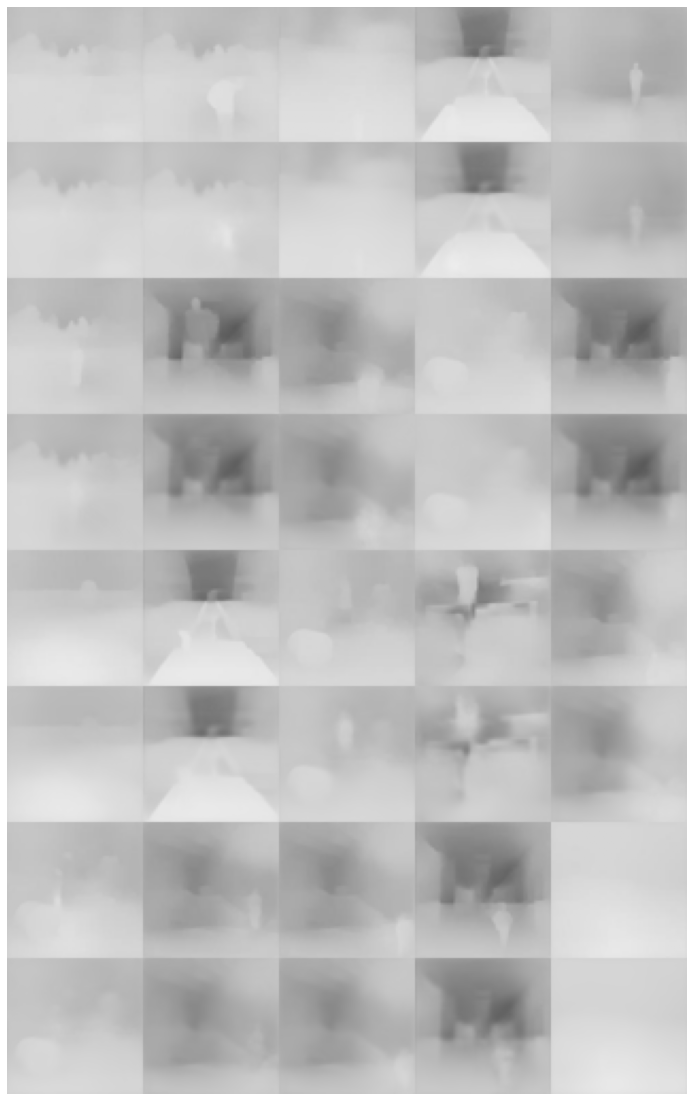

In [20]:
from torch.optim.lr_scheduler import StepLR

scheduler = StepLR(optim, step_size = 50, gamma=0.1, last_epoch=-1)

for epoch in range(151,301):
  start = time.time()
  train.train(model, criterion, device, train_dl, optim, epoch, writer)
  end = time.time()
  print('Epoch - ', str(epoch), '-- Time Taken - ', str(end - start) )
  # val_loss = validate(model, criterion, device, validate_dl)
  # print(val_loss)
  scheduler.step()
  if epoch % 10 == 0:
    file_name = str(weights_folder) + '/epoch-' + str(epoch) + 'dweights.pth'
    torch.save(model.state_dict(), file_name)